In [1]:
import importlib

import settings
import VPINN_tri
import mesh_lib

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
# from GaussJacobiQuadRule_V3 import Jacobi, DJacobi, GaussLobattoJacobiWeights
import os 

importlib.reload(settings)
importlib.reload(mesh_lib)
importlib.reload(VPINN_tri)

from settings import *
from mesh_lib import *
from VPINN_tri import *

2023-11-25 18:50:38.444022: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-25 18:50:39.138503: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


settings_lib imported 
interpolator_lib imported
VPINN_tri_lib  imported
mesh_lib imported
settings_lib imported 
mesh_lib imported
VPINN_tri_lib  imported


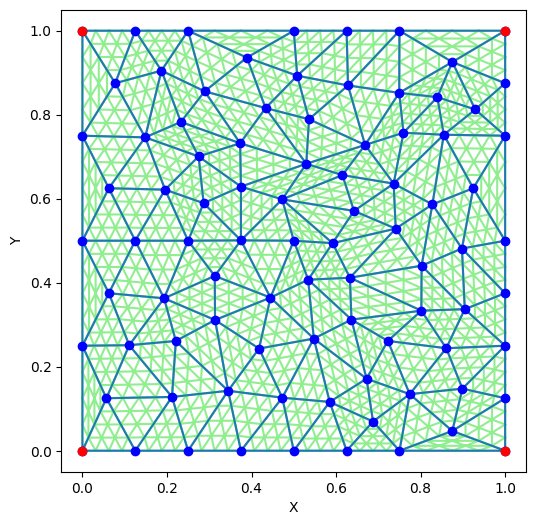

In [2]:
domain = [(0,0), (1,0), (1,1), (0,1)]
mymesh=Mesh(domain,0.01,5)
mymesh.plot_sub_mesh()

basis:
basis function number :  1

1 x^0 y^0 -761/35 x^1 y^0 59062/315 x^2 y^0 -4272/5 x^3 y^0 34208/15 x^4 y^0 -18432/5 x^5 y^0 53248/15 x^6 y^0 -65536/35 x^7 y^0 131072/315 x^8 y^0 -761/35 x^0 y^1 118124/315 x^1 y^1 -12816/5 x^2 y^1 136832/15 x^3 y^1 -18432 x^4 y^1 106496/5 x^5 y^1 -65536/5 x^6 y^1 1048576/315 x^7 y^1 59062/315 x^0 y^2 -12816/5 x^1 y^2 68416/5 x^2 y^2 -36864 x^3 y^2 53248 x^4 y^2 -196608/5 x^5 y^2 524288/45 x^6 y^2 -4272/5 x^0 y^3 136832/15 x^1 y^3 -36864 x^2 y^3 212992/3 x^3 y^3 -65536 x^4 y^3 1048576/45 x^5 y^3 34208/15 x^0 y^4 -18432 x^1 y^4 53248 x^2 y^4 -65536 x^3 y^4 262144/9 x^4 y^4 -18432/5 x^0 y^5 106496/5 x^1 y^5 -196608/5 x^2 y^5 1048576/45 x^3 y^5 53248/15 x^0 y^6 -65536/5 x^1 y^6 524288/45 x^2 y^6 -65536/35 x^0 y^7 1048576/315 x^1 y^7 131072/315 x^0 y^8 

basis function number :  2

0 x^0 y^0 64 x^1 y^0 -30784/35 x^2 y^0 44672/9 x^3 y^0 -673792/45 x^4 y^0 235520/9 x^5 y^0 -1196032/45 x^6 y^0 131072/9 x^7 y^0 -1048576/315 x^8 y^0 0 x^0 y^1 -30784/35 x^1 y

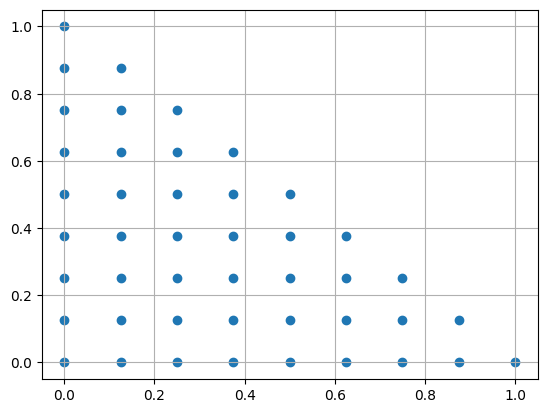

In [3]:
B=interpolator(8,True,False,points=None)

In [4]:
points = mymesh._get_element_points(10)


points =  np.random.rand(10,2).astype(np.float64)

points=points[points.sum(axis=1) < 1]

basis:
basis function number :  1

1 x^0 y^0 -147/10 x^1 y^0 406/5 x^2 y^0 -441/2 x^3 y^0 315 x^4 y^0 -1134/5 x^5 y^0 324/5 x^6 y^0 -147/10 x^0 y^1 812/5 x^1 y^1 -1323/2 x^2 y^1 1260 x^3 y^1 -1134 x^4 y^1 1944/5 x^5 y^1 406/5 x^0 y^2 -1323/2 x^1 y^2 1890 x^2 y^2 -2268 x^3 y^2 972 x^4 y^2 -441/2 x^0 y^3 1260 x^1 y^3 -2268 x^2 y^3 1296 x^3 y^3 315 x^0 y^4 -1134 x^1 y^4 972 x^2 y^4 -1134/5 x^0 y^5 1944/5 x^1 y^5 324/5 x^0 y^6 

basis function number :  2

0 x^0 y^0 36 x^1 y^0 -1566/5 x^2 y^0 1044 x^3 y^0 -1674 x^4 y^0 1296 x^5 y^0 -1944/5 x^6 y^0 0 x^0 y^1 -1566/5 x^1 y^1 2088 x^2 y^1 -5022 x^3 y^1 5184 x^4 y^1 -1944 x^5 y^1 0 x^0 y^2 1044 x^1 y^2 -5022 x^2 y^2 7776 x^3 y^2 -3888 x^4 y^2 0 x^0 y^3 -1674 x^1 y^3 5184 x^2 y^3 -3888 x^3 y^3 0 x^0 y^4 1296 x^1 y^4 -1944 x^2 y^4 0 x^0 y^5 -1944/5 x^1 y^5 0 x^0 y^6 

basis function number :  3

0 x^0 y^0 -45 x^1 y^0 1053/2 x^2 y^0 -4149/2 x^3 y^0 3699 x^4 y^0 -3078 x^5 y^0 972 x^6 y^0 0 x^0 y^1 513/2 x^1 y^1 -2610 x^2 y^1 7884 x^3 y^1 -9396 x^4

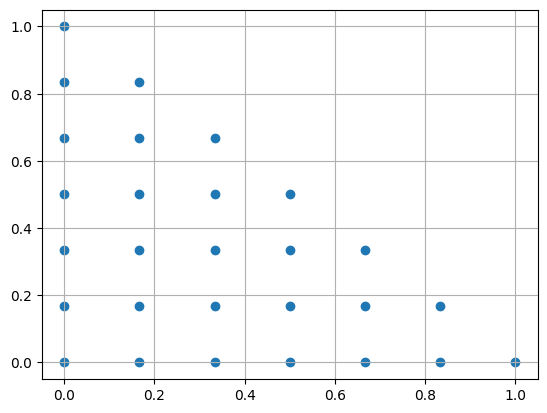

In [5]:
B=interpolator(6,True,True,points=points)

In [7]:
val=np.zeros((B.n,1),dtype=np.float64)
val[0]=1
val[1]=2

In [9]:
print(B.interpolate_pre(val))

[[ 0.01193609]
 [-0.0126939 ]
 [ 0.00443826]
 [-0.00205061]
 [ 0.00258435]
 [ 0.01036411]]


In [10]:
print(B.interpolate_pre_dx(val))
print()
print(B.interpolate_pre_dy(val))


[[-0.05834741]
 [ 0.03684943]
 [ 0.26770261]
 [ 0.06648602]
 [ 0.18805358]
 [ 0.36180705]]

[[ 1.28783594e-01]
 [ 7.07322094e-02]
 [ 7.61514219e-02]
 [-9.36502372e-05]
 [ 2.03865131e-02]
 [ 2.22159764e-01]]


In [11]:
print(B.interpolate_pre_d2x(val))
print()
print(B.interpolate_pre_d2y(val))

[[-4.4975737 ]
 [ 4.39083977]
 [-0.22227417]
 [ 0.63183403]
 [-0.29892349]
 [-8.09104506]]

[[ -44.54325523]
 [  35.21081315]
 [   7.14157759]
 [   3.43738647]
 [  -5.04876089]
 [-105.56770124]]


In [12]:
print(B.Nodes)

[[0.         0.        ]
 [1.         0.        ]
 [0.         1.        ]
 [0.16666667 0.        ]
 [0.33333333 0.        ]
 [0.5        0.        ]
 [0.66666667 0.        ]
 [0.83333333 0.        ]
 [0.83333333 0.16666667]
 [0.66666667 0.33333333]
 [0.5        0.5       ]
 [0.33333333 0.66666667]
 [0.16666667 0.83333333]
 [0.         0.83333333]
 [0.         0.66666667]
 [0.         0.5       ]
 [0.         0.33333333]
 [0.         0.16666667]
 [0.16666667 0.16666667]
 [0.33333333 0.16666667]
 [0.5        0.16666667]
 [0.66666667 0.16666667]
 [0.16666667 0.33333333]
 [0.33333333 0.33333333]
 [0.5        0.33333333]
 [0.16666667 0.5       ]
 [0.33333333 0.5       ]
 [0.16666667 0.66666667]]


In [13]:
print(mymesh.meshed_elements[0]._get_element_points(0))

vertices=mymesh.meshed_elements[0]._get_element_points(0)


[[0.67208963 0.17145705]
 [0.69763589 0.16227948]
 [0.68468762 0.19395315]]


In [14]:
M,c,det,B_D,B_DD=B.change_of_coordinates(vertices)

In [15]:
print(M,c)
print(np.shape(c))

[[ 0.02554626  0.01259799]
 [-0.00917757  0.02249609]] [[0.67208963]
 [0.17145705]]
(2, 1)


In [16]:
points=B.Nodes
translated=(M@points.T+c)

print(translated,translated.shape)


[[0.67208963 0.69763589 0.68468762 0.67634734 0.68060505 0.68486276
  0.68912047 0.69337818 0.69547785 0.6933198  0.69116176 0.68900371
  0.68684567 0.68258796 0.68048829 0.67838863 0.67628896 0.6741893
  0.67844701 0.68270472 0.68696243 0.69122014 0.68054667 0.68480438
  0.68906209 0.68264634 0.68690405 0.684746  ]
 [0.17145705 0.16227948 0.19395315 0.16992746 0.16839786 0.16686827
  0.16533867 0.16380908 0.16755843 0.17283737 0.17811631 0.18339526
  0.1886742  0.1902038  0.18645445 0.1827051  0.17895575 0.1752064
  0.17367681 0.17214721 0.17061762 0.16908802 0.17742616 0.17589656
  0.17436697 0.1811755  0.17964591 0.18492485]] (2, 28)


[[0.72318216 0.15310191]
 [0.71023388 0.18477558]
 [0.73578015 0.17559801]]


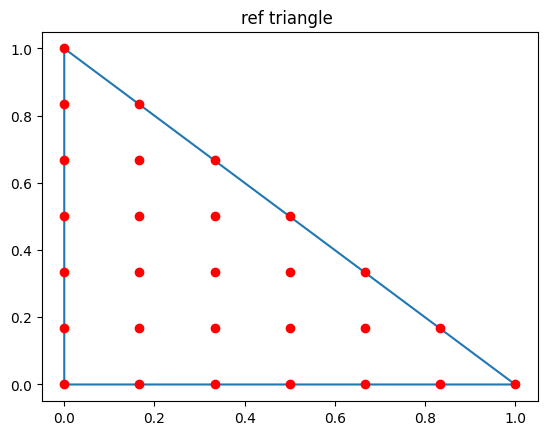

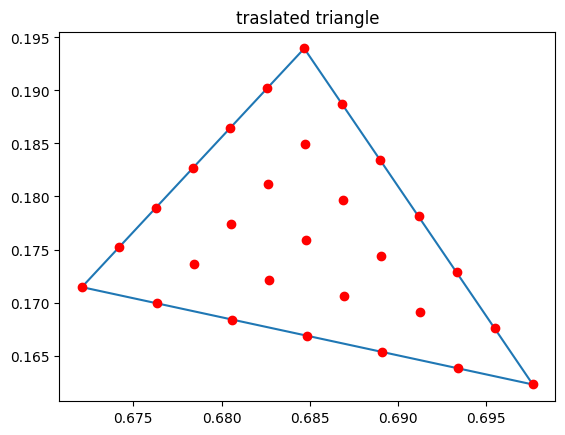

In [17]:
print(mymesh.meshed_elements[0]._get_element_points(3))


plt.triplot([0, 1, 0], [0, 0, 1])
plt.title('ref triangle ')
plt.scatter(B.Nodes[:,0], B.Nodes[:,1], c='r')
plt.show()

plt.triplot(vertices[:,0], vertices[:,1])
plt.title('traslated triangle')
plt.scatter(translated[0,:], translated[1,:], c='r')

In [18]:
print(B_D)
print(B_DD)

[[ 32.58838923  13.29485185]
 [-18.24975695  37.00694129]]
[[1062.00311249  176.75308581]
 [ 333.05362891 1369.51370382]]


In [19]:
print(mymesh.meshed_elements[0]._get_element_points(1))

[[0.69763589 0.16227948]
 [0.68468762 0.19395315]
 [0.71023388 0.18477558]]


In [20]:
mymesh.meshed_elements[0]._get_elements()

[[0, 1, 5],
 [1, 5, 6],
 [1, 2, 6],
 [2, 6, 7],
 [2, 3, 7],
 [3, 7, 8],
 [3, 4, 8],
 [5, 6, 9],
 [6, 9, 10],
 [6, 7, 10],
 [7, 10, 11],
 [7, 8, 11],
 [9, 10, 12],
 [10, 12, 13],
 [10, 11, 13],
 [12, 13, 14]]

In [21]:
print(mymesh.meshed_elements[0]._get_vertices())

[[0.67208963 0.17145705]
 [0.69763589 0.16227948]
 [0.72318216 0.15310191]
 [0.74872842 0.14392434]
 [0.77427468 0.13474677]
 [0.68468762 0.19395315]
 [0.71023388 0.18477558]
 [0.73578015 0.17559801]
 [0.76132641 0.16642044]
 [0.69728561 0.21644924]
 [0.72283188 0.20727167]
 [0.74837814 0.1980941 ]
 [0.7098836  0.23894533]
 [0.73542987 0.22976776]
 [0.72248159 0.26144142]]


In [22]:
p=3

n = (p + 1) * (p + 2) // 2

n_inside_edge=p-1

n_inside=(p*p -2*p +2)//2






nodes = [
    [Rational(j, p), Rational(i, p)]
    for i in range(0, p + 1)
    for j in range(0, p + 1)
    if i + j <= p
]


N=[]

N.append([Rational(0, 1), Rational(0, 1)])
N.append([Rational(1, 1), Rational(0, 1)])
N.append([Rational(0, 1), Rational(1, 1)])

for index in range(1,p):
    n=[Rational(index,p), Rational(0, 1)]
    N.append(n)

for index in range(1,p):
    n=[Rational(p-index,p), Rational(index,p)]
    N.append(n)

for index in range(1,p):
    n=[Rational(0,1), Rational(p-index, p)]
    N.append(n)


for i in range(1, p + 1):
    for j in range(1, p + 1):
        if i + j < p:
            N.append([Rational(j, p), Rational(i, p)])



print(nodes)
print(len(nodes))
print(N)
print(len(N))



[[0, 0], [1/3, 0], [2/3, 0], [1, 0], [0, 1/3], [1/3, 1/3], [2/3, 1/3], [0, 2/3], [1/3, 2/3], [0, 1]]
10
[[0, 0], [1, 0], [0, 1], [1/3, 0], [2/3, 0], [2/3, 1/3], [1/3, 2/3], [0, 2/3], [0, 1/3], [1/3, 1/3]]
10


In [23]:
a=nodes
b=N

order=[]
for e in b:
    order.append(a.index(e))

print(a)
print(b)
print(order)


print(np.array(a)[order])


[[0, 0], [1/3, 0], [2/3, 0], [1, 0], [0, 1/3], [1/3, 1/3], [2/3, 1/3], [0, 2/3], [1/3, 2/3], [0, 1]]
[[0, 0], [1, 0], [0, 1], [1/3, 0], [2/3, 0], [2/3, 1/3], [1/3, 2/3], [0, 2/3], [0, 1/3], [1/3, 1/3]]
[0, 3, 9, 1, 2, 6, 8, 7, 4, 5]
[[0 0]
 [1 0]
 [0 1]
 [1/3 0]
 [2/3 0]
 [2/3 1/3]
 [1/3 2/3]
 [0 2/3]
 [0 1/3]
 [1/3 1/3]]


In [24]:
def find_order(nodes):
    N=[]
    N.append([Rational(0, 1), Rational(0, 1)])
    N.append([Rational(1, 1), Rational(0, 1)])
    N.append([Rational(0, 1), Rational(1, 1)])

    for index in range(1,p):
        n=[Rational(index,p), Rational(0, 1)]
        N.append(n)

    for index in range(1,p):
        n=[Rational(p-index,p), Rational(index,p)]
        N.append(n)

    for index in range(1,p):
        n=[Rational(0,1), Rational(p-index, p)]
        N.append(n)


    for i in range(1, p + 1):
        for j in range(1, p + 1):
            if i + j < p:
                N.append([Rational(j, p), Rational(i, p)])


    order=[]
    for e in nodes:
        order.append(N.index(e))

    return order

In [25]:
order=find_order(np.array(nodes))
print(order)



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()